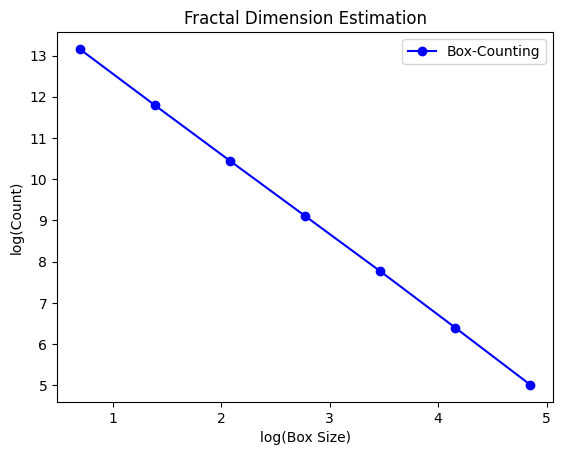

Estimated fractal dimension: 1.9541360293142944


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load image and convert to grayscale
image = cv2.imread('/workspaces/Python_Physics/Images/PDVB Butanol 4% wt to vol (7).jpeg', 0)

# Convert image to binary (black and white)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

# Define the box-counting function
def box_count(img, box_size):
    """ Count the number of boxes of a given size that contain part of the structure. """
    (rows, cols) = img.shape
    count = 0
    for i in range(0, rows, box_size):
        for j in range(0, cols, box_size):
            if np.any(img[i:i + box_size, j:j + box_size]):
                count += 1
    return count

# Apply box-counting for different box sizes
box_sizes = [2, 4, 8, 16, 32, 64, 128]
counts = []

for size in box_sizes:
    counts.append(box_count(binary_image, size))

# Perform a log-log plot to estimate fractal dimension
log_box_sizes = np.log(box_sizes)
log_counts = np.log(counts)

plt.plot(log_box_sizes, log_counts, 'bo-', label="Box-Counting")
plt.xlabel('log(Box Size)')
plt.ylabel('log(Count)')
plt.title('Fractal Dimension Estimation')
plt.legend()
plt.show()

# Calculate the slope (fractal dimension)
coeffs = np.polyfit(log_box_sizes, log_counts, 1)
fractal_dimension = -coeffs[0]
print(f"Estimated fractal dimension: {fractal_dimension}")
